<img src="images/opencv_sunu01.jpg" />

<img src="images/opencv_sunu06.jpg" />

<img src="images/opencv_sunu07.jpg" />

# RGB renk uzayı Kırmızı Yeşil Mavi eksenlerinde bir renk kodlaması sistemi
* Red   : Kırmızı
* Green : Yeşil
* Blue  : Mavi

    * Uyarı : OpenCv okurken BGR sıralamasıyla okur

<img src="images/opencv_sunu08.jpg" />

# HSV Renk Uzayı
* Hue        : Renk özü ( Açısal 0 - 180 )
* Saturation : Doygunluk 
* Value      : Parlaklık
    
    ** Uyarı : OpenCv 8 bit sınırlaması için Hue değerlerinin yarısını kullanır

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
img = cv2.imread('zed_images/img00000021.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [62]:
img.shape

(376L, 1344L, 3L)

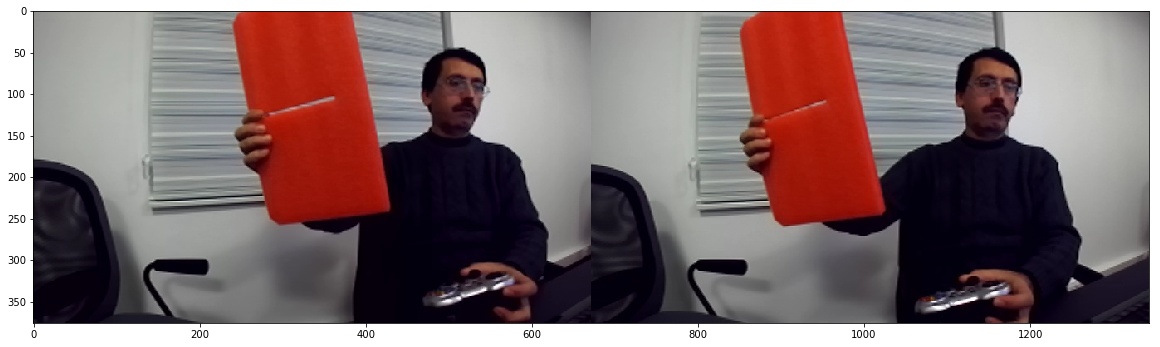

In [4]:
plt.figure(figsize=(20,44))
plt.imshow(img)
plt.show()

In [5]:
left = img[:,:672,:]

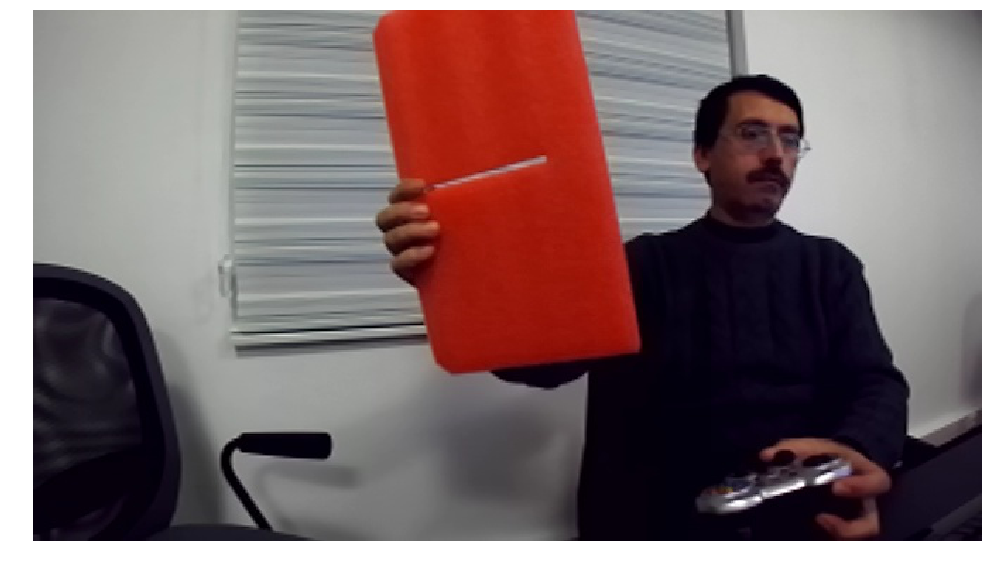

In [6]:
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(left)
plt.show()

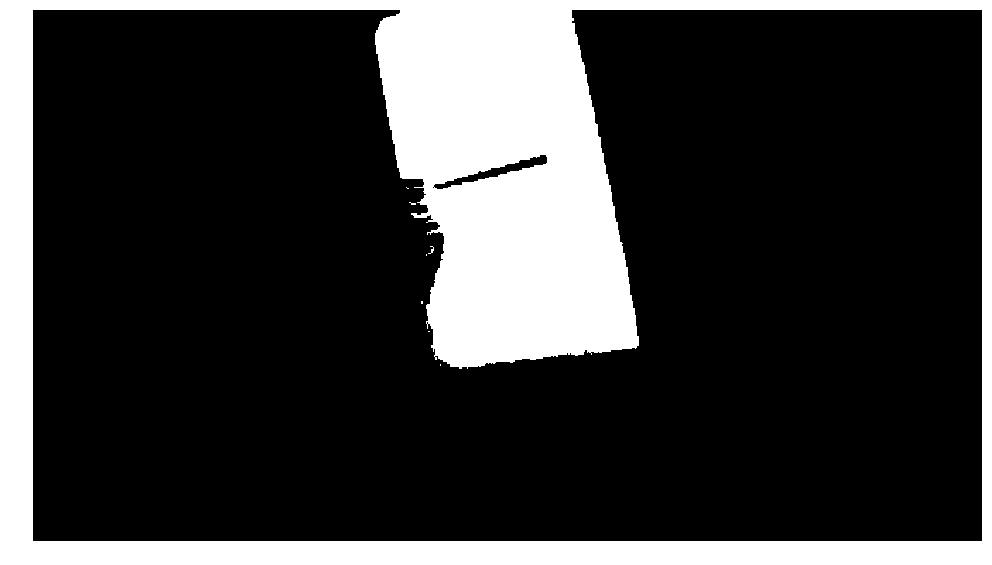

In [7]:
rgb_lower_filter = (130,0,0)
rgb_upper_filter = (255,64,255)
mask = cv2.inRange(left, rgb_lower_filter, rgb_upper_filter)
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()

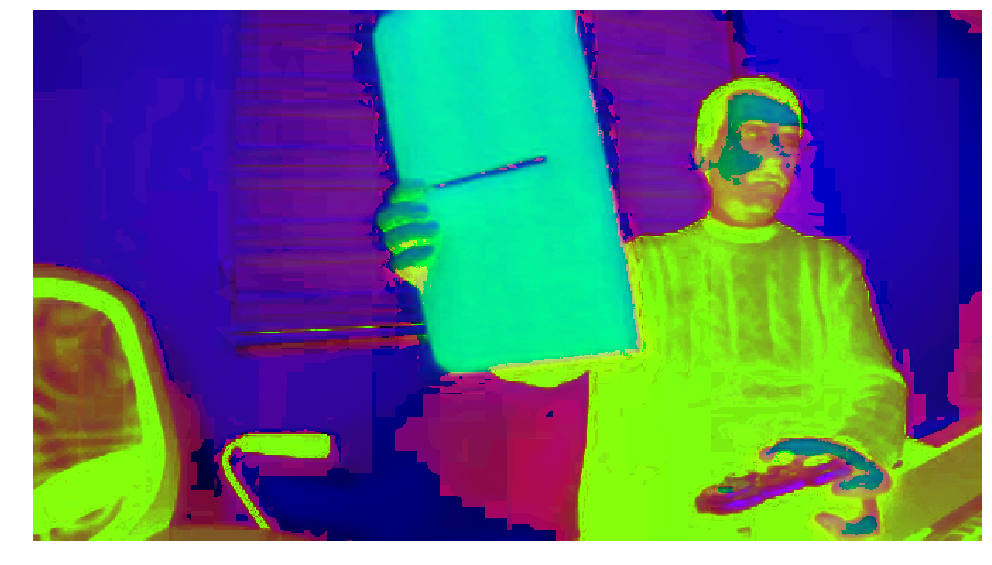

In [8]:
hsv = cv2.cvtColor(left,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(hsv)
plt.show()

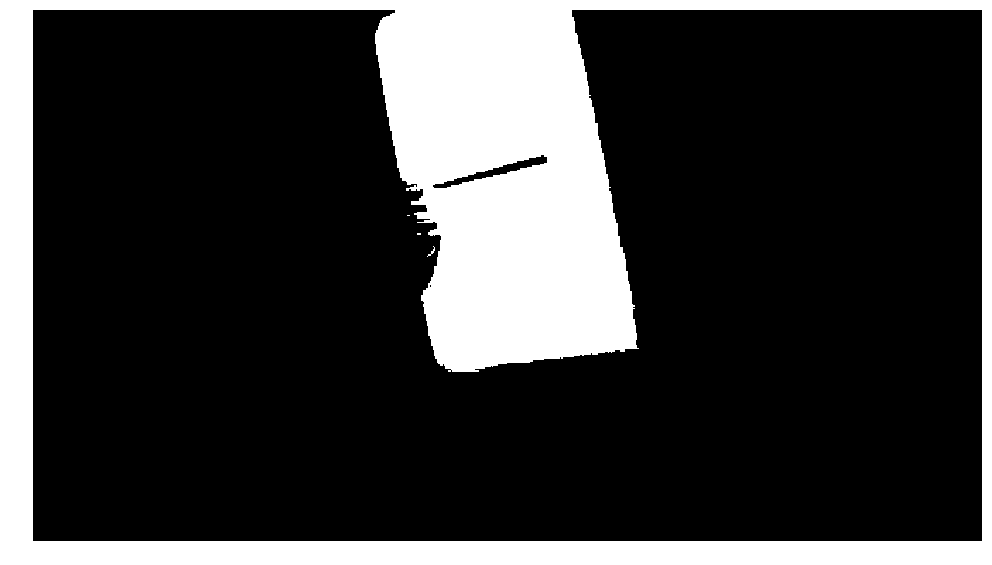

In [9]:
hsv_lower_filter = (0, 166, 114)
hsv_upper_filter = (19, 255, 255)
mask = cv2.inRange(hsv, hsv_lower_filter, hsv_upper_filter)
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()

In [55]:
img = cv2.imread('zed_images/img00000081.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
left = img[:,:672,:]

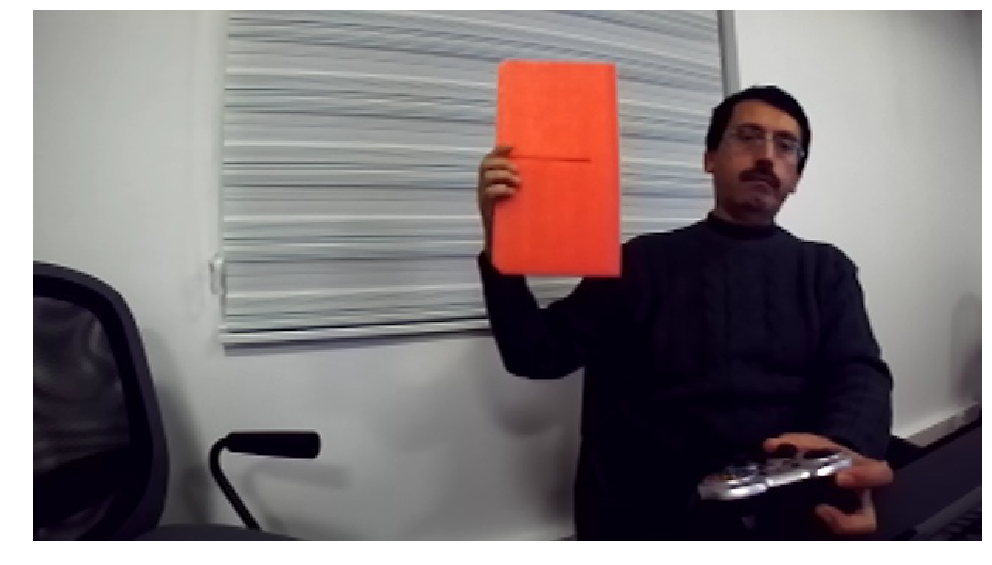

In [11]:
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(left)
plt.show()

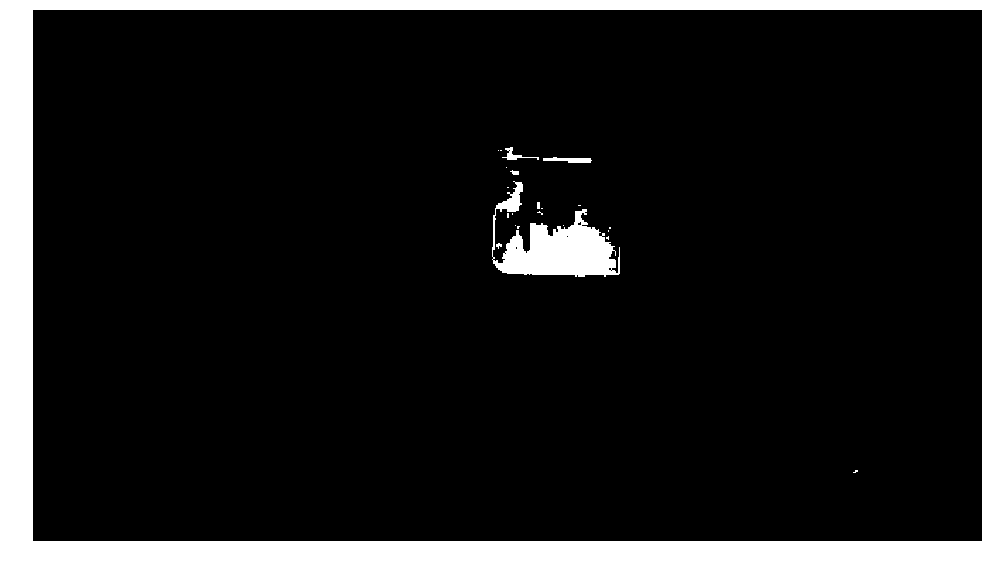

In [12]:
rgb_lower_filter = (130,0,0)
rgb_upper_filter = (255,64,255)
mask = cv2.inRange(left, rgb_lower_filter, rgb_upper_filter)
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()

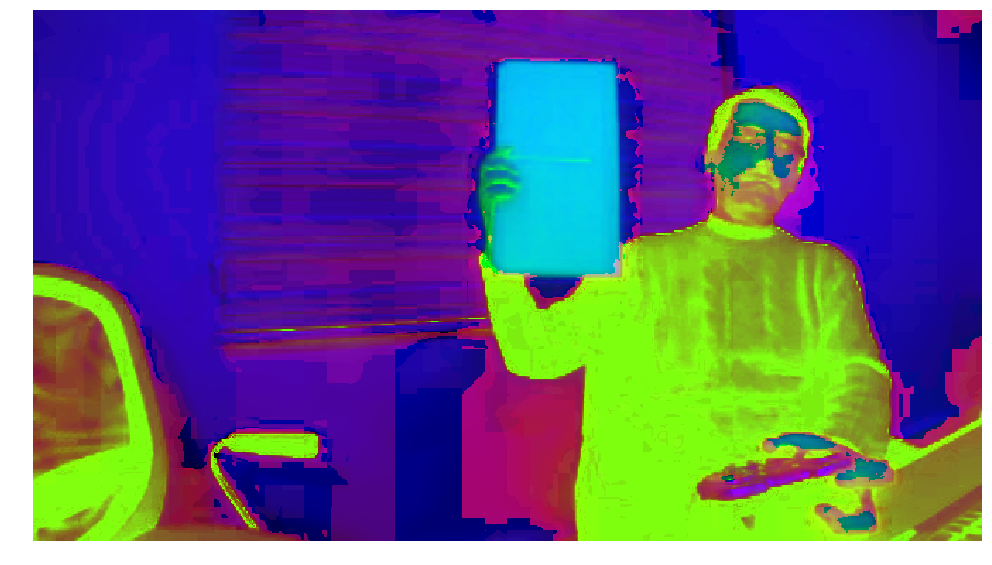

In [13]:
hsv = cv2.cvtColor(left,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(hsv)
plt.show()

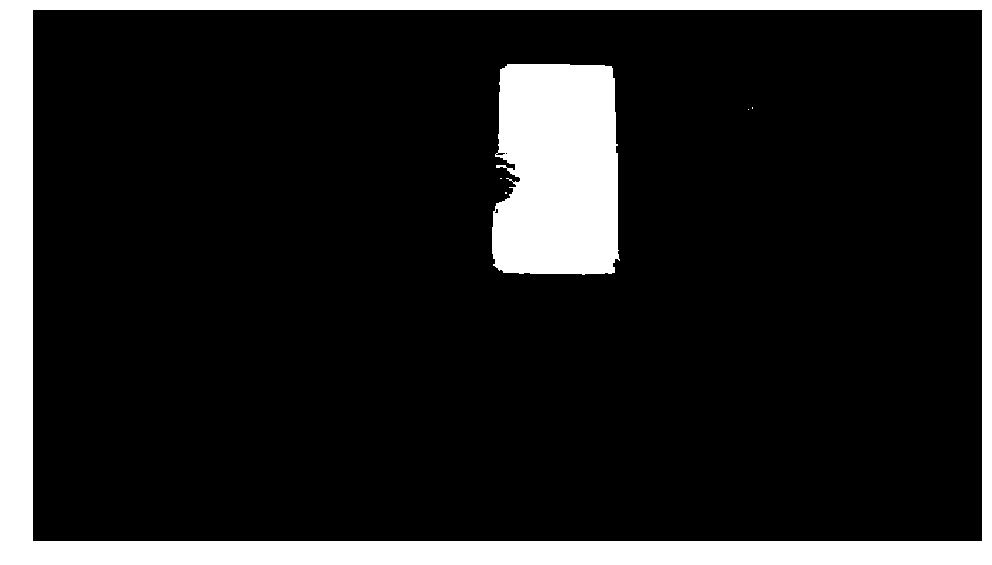

In [14]:
mask = cv2.inRange(hsv, hsv_lower_filter, hsv_upper_filter)
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()

# Konum ve Büyüklük Tespiti

* Sınır Çizgisi Tespiti : findContours
* Sınır Çizgisinden Minimum Kapsayan Çemberi bulma : minEnclosingCircle
* Sınır Çizgisinden Minimum Kapsayan Dikdörtgen bulma : boundingRect


In [37]:
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image, contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use cv::compare, cv::inRange, cv::threshold ,
    .   cv::adaptiveThreshold, cv::Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to cv::RETR_CCOMP or cv::RETR_FLOODFILL, the input can also be a 32-bit integer image of l

In [18]:
mask.shape

(376L, 672L)

In [44]:
# Sınır çizgilerini bulmak için filtre sonucu elde ettiğimiz mask görüntüsünü veriyoruz
# mode = cv2.RETR_EXTERNAL  sadece dış hatları bulanlamında - Fonksiyon çok daha detaylı sonuçlar dönebiliyor -
# metod : cv2.CHAIN_APPROX_SIMPLE  Sınır çizgilerinin tutulma metodu. 
#         Bu metodda yatay dikey yada çapraz sınırlarda sadece köşe noktalar tutulur
# Dönüş değeri olarak sadece sınır çizgileri alıyoruz
contours,_= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [45]:
len(contours)

5

In [46]:
center_list = []
radius_list = []
for cnt in contours:
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center_list.append((int(x),int(y)))
    radius_list.append(int(radius))
ix = np.argmax(radius_list)

In [63]:
print 'Nesne Konumu : ',center_list[ix]
print 'Nesne Büyüklüğü : ',radius_list[ix]

Nesne Konumu :  (371, 112)
Nesne Büyüklüğü :  82


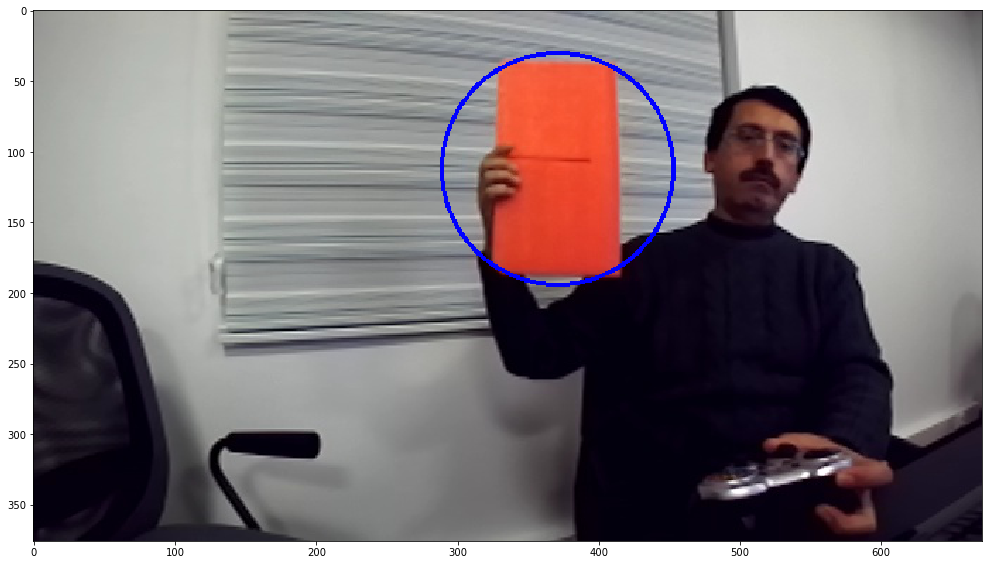

In [64]:
out_image = left.copy()
cv2.circle(out_image,center_list[ix],radius_list[ix],(0,0,255),2)
plt.figure(figsize=(17,30))
#plt.axis("off")
plt.imshow(out_image)
plt.show()

In [65]:
x,y,w,h = cv2.boundingRect(contours[ix])
out_image = left.copy()
cv2.rectangle(out_image,(x,y),(x+w,y+h),(0,255,255),2)
print 'Kapsayan Dikdörtgen sol üst : ',(x,y)
print 'Kapsayan Dikdörtgen En / Boy : ',(w,h)

Kapsayan Dikdörtgen sol üst :  (325, 38)
Kapsayan Dikdörtgen En / Boy :  (91, 150)


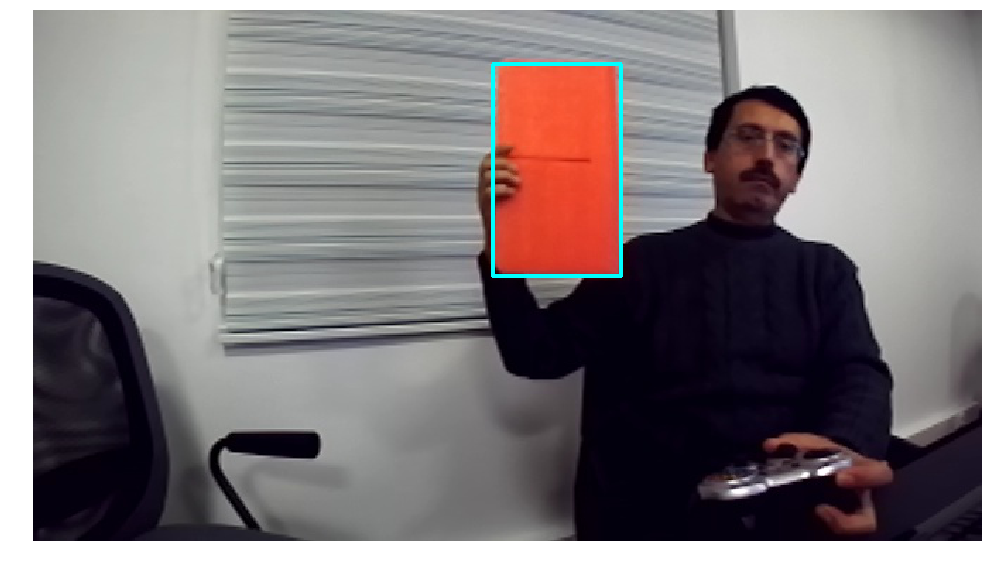

In [59]:
plt.figure(figsize=(17,30))
plt.axis("off")
plt.imshow(out_image)
plt.show()

# Ödev :
* Yukarda Öğrendiklerimizi kamera görüntüsü üzerinde uygulayın ve kaydedin (hocanın elindeki kırmızı cisim yerine mavi bir cisim üzerinde deneyiniz. Defter,su şişesi gibi)